In [12]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline

### READ JSON FILES

In [5]:
jsons = os.listdir("DATA")
jsons

['yelp.json',
 'imdb.json',
 'geography.json',
 'scholar.json',
 'academic.json',
 'wikisql.json',
 'atis.json',
 'advising.json',
 'spider.json',
 'restaurants.json']

In [6]:
data_json = []
for i in jsons:   
    if i != '.DS_Store':
        file = open(f'DATA/{i}')        
        data_json.append((json.load(file)))
        print(i)
    else:
        os.remove(f'DATA/.DS_Store')


yelp.json
imdb.json
geography.json
scholar.json
academic.json
wikisql.json
atis.json
advising.json
spider.json
restaurants.json


### ACADEMIC

In [7]:
academicF = open('DATA/academic.json')
academic_json = json.load(academicF)
len(academic_json)

185

In [8]:
final_academic = pd.DataFrame(columns = ['question','source','sql'])
final_academic['question'] = [item['sentences'][0]['text'] for item in academic_json]
final_academic['sql'] = [item['sql'][0] for item in academic_json]
final_academic['source'] = 'academic'

In [9]:
final_academic.head()

,question,source,sql
0,return me the homepage of journal_name0 .,academic,SELECT JOURNALalias0.HOMEPAGE FROM JOURNAL AS ...
1,"return me the homepage of "" author_name0 "" .",academic,SELECT AUTHORalias0.HOMEPAGE FROM AUTHOR AS AU...
2,"return me the abstract of "" publication_title0...",academic,SELECT PUBLICATIONalias0.ABSTRACT FROM PUBLICA...
3,"return me the year of "" publication_title0 """,academic,SELECT PUBLICATIONalias0.YEAR FROM PUBLICATION...
4,return me the papers after publication_year0 .,academic,SELECT PUBLICATIONalias0.TITLE FROM PUBLICATIO...


### ADVISING

In [33]:
advisingF = open('DATA/advising.json')
advising_json = json.load(advisingF)



In [34]:
final_advising = pd.DataFrame(columns=['question','source','sql'])
for j in range(len(advising_json)):
    sentence = []
    temp = pd.DataFrame(columns=['question','source','sql'])
    n = len(advising_json[j]['sentences']) - 1
    for i,sent in enumerate(advising_json[j]['sentences']):
        sentence.append(sent['text'])
    temp['question'] =  sentence
    temp['source'] = 'advising'
    temp['sql'] = advising_json[j]['sql'][0]
    final_advising = pd.concat([final_advising, temp], axis=0)


In [35]:
final_advising

,question,source,sql
0,Can undergrads take number0 ?,advising,SELECT DISTINCT COURSEalias0.ADVISORY_REQUIREM...
1,number0 can be taken by undergrads : true or f...,advising,SELECT DISTINCT COURSEalias0.ADVISORY_REQUIREM...
2,number0 is taken by undergrads ?,advising,SELECT DISTINCT COURSEalias0.ADVISORY_REQUIREM...
3,Are undergrads able to take number0 ?,advising,SELECT DISTINCT COURSEalias0.ADVISORY_REQUIREM...
4,Are undergrads allowed to take number0 ?,advising,SELECT DISTINCT COURSEalias0.ADVISORY_REQUIREM...
...,...,...,...
10,What amount of level0 -level classes are avail...,advising,SELECT COUNT( DISTINCT COURSEalias0.DEPARTMENT...
11,What number of level0 -level courses are offer...,advising,SELECT COUNT( DISTINCT COURSEalias0.DEPARTMENT...
12,Of the classes being offered in Fall and Winte...,advising,SELECT COUNT( DISTINCT COURSEalias0.DEPARTMENT...
13,Fall and Winter terms offer how many level0 -l...,advising,SELECT COUNT( DISTINCT COURSEalias0.DEPARTMENT...


### ATIS

In [36]:
atisF = open('DATA/atis.json')
atis_json = json.load(atisF)

In [37]:
final_atis = pd.DataFrame(columns=['question','source','sql'])
for j in range(len(atis_json)):
    sentence = []
    temp = pd.DataFrame(columns=['question','source','sql'])

    for i,sent in enumerate(atis_json[j]['sentences']):
        sentence.append(sent['text'])
    temp['question'] =  sentence
    temp['source'] = 'atis'
    temp['sql'] = atis_json[j]['sql'][0]
    final_atis = pd.concat([final_atis, temp], axis=0)

In [38]:
final_atis

,question,source,sql
0,list all the flights that arrive at airport_co...,atis,SELECT DISTINCT FLIGHTalias0.FLIGHT_ID FROM AI...
1,what flights from any city land at airport_code0,atis,SELECT DISTINCT FLIGHTalias0.FLIGHT_ID FROM AI...
2,show me the flights into airport_code0,atis,SELECT DISTINCT FLIGHTalias0.FLIGHT_ID FROM AI...
3,show me the flights arriving at airport_code0,atis,SELECT DISTINCT FLIGHTalias0.FLIGHT_ID FROM AI...
4,list all the flights that arrive at airport_code0,atis,SELECT DISTINCT FLIGHTalias0.FLIGHT_ID FROM AI...
...,...,...,...
0,please find a flight round trip from city_name...,atis,SELECT DISTINCT FLIGHTalias0.FLIGHT_ID FROM FL...
0,please find a flight from city_name2 to city_n...,atis,SELECT DISTINCT FLIGHTalias0.FLIGHT_ID FROM FL...
0,is there one airline that flies from city_name...,atis,SELECT DISTINCT AIRLINEalias0.AIRLINE_CODE FRO...
0,i'd like to book two flights to city_name0,atis,SELECT DISTINCT FLIGHTalias0.FLIGHT_ID FROM FL...


### GEOGRAPHY

In [39]:
geoF = open('DATA/geography.json')
geo_json = json.load(geoF)

In [40]:
final_geo = pd.DataFrame(columns=['question','source','sql'])
for j in range(len(geo_json)):
    sentence = []
    temp = pd.DataFrame(columns=['question','source','sql'])
    for i,sent in enumerate(geo_json[j]['sentences']):
        sentence.append(sent['text'])
    temp['question'] =  sentence
    temp['source'] = 'geography'
    temp['sql'] = geo_json[j]['sql'][0]
    final_geo = pd.concat([final_geo, temp], axis=0)

In [41]:
final_geo

,question,source,sql
0,what is the biggest city in state_name0,geography,SELECT CITYalias0.CITY_NAME FROM CITY AS CITYa...
1,what state_name0 city has the largest population,geography,SELECT CITYalias0.CITY_NAME FROM CITY AS CITYa...
2,what is the largest city in state_name0,geography,SELECT CITYalias0.CITY_NAME FROM CITY AS CITYa...
3,what is the biggest city in state_name0,geography,SELECT CITYalias0.CITY_NAME FROM CITY AS CITYa...
4,what is the biggest city in state_name0,geography,SELECT CITYalias0.CITY_NAME FROM CITY AS CITYa...
...,...,...,...
0,what are the major cities in the states throug...,geography,SELECT CITYalias0.CITY_NAME FROM CITY AS CITYa...
0,which states does not border state_name0,geography,SELECT STATEalias0.STATE_NAME FROM STATE AS ST...
0,how many states border the largest state,geography,SELECT COUNT( BORDER_INFOalias0.BORDER ) FROM ...
0,which state is the largest city in state_name0 in,geography,SELECT CITYalias0.STATE_NAME FROM CITY AS CITY...


### imdb

In [42]:
imdb = open('DATA/imdb.json')
imdb_json = json.load(imdb)

In [43]:
final_imdb = pd.DataFrame(columns=['question','source','sql'])
for j in range(len(imdb_json)):
    sentence = []
    temp = pd.DataFrame(columns=['question','source','sql'])
    for i,sent in enumerate(imdb_json[j]['sentences']):
        sentence.append(sent['text'])
    temp['question'] =  sentence
    temp['source'] = 'imdb'
    temp['sql'] = imdb_json[j]['sql'][0]
    final_imdb = pd.concat([final_imdb, temp], axis=0)

In [44]:
final_imdb

,question,source,sql
0,"What year is the movie "" movie_title0 "" from ?",imdb,SELECT MOVIEalias0.RELEASE_YEAR FROM MOVIE AS ...
1,"What year was the movie "" movie_title0 "" produced",imdb,SELECT MOVIEalias0.RELEASE_YEAR FROM MOVIE AS ...
0,"What year was "" actor_name0 "" born ?",imdb,SELECT ACTORalias0.BIRTH_YEAR FROM ACTOR AS AC...
1,"In what year was "" actor_name0 "" born",imdb,SELECT ACTORalias0.BIRTH_YEAR FROM ACTOR AS AC...
0,"What is the nationality of the actress "" actor...",imdb,SELECT ACTORalias0.NATIONALITY FROM ACTOR AS A...
...,...,...,...
0,Find the name and budget of the latest movie b...,imdb,"SELECT MOVIEalias0.BUDGET , MOVIEalias0.TITLE ..."
0,"Who is directed the latest movie by "" company_...",imdb,SELECT DIRECTORalias0.NAME FROM COMPANY AS COM...
0,"What is the latest movie by "" director_name0 """,imdb,SELECT MOVIEalias0.TITLE FROM DIRECTED_BY AS D...
0,Which producer has worked with the most number...,imdb,SELECT PRODUCERalias0.NAME FROM DIRECTED_BY AS...


### restaurants

In [45]:
rest = open('DATA/restaurants.json')
rest_json = json.load(rest)

In [46]:
final_rest = pd.DataFrame(columns=['question','source','sql'])
for j in range(len(rest_json)):
    sentence = []
    temp = pd.DataFrame(columns=['question','source','sql'])
    for i,sent in enumerate(rest_json[j]['sentences']):
        sentence.append(sent['text'])
    temp['question'] =  sentence
    temp['source'] = 'restaurants'
    temp['sql'] = rest_json[j]['sql'][0]
    final_rest = pd.concat([final_rest, temp], axis=0)

In [47]:
final_rest

,question,source,sql
0,how many name0 are there in city_name0 ?,restaurants,SELECT COUNT( * ) FROM LOCATION AS LOCATIONali...
1,how many name0 are there in city_name0 ?,restaurants,SELECT COUNT( * ) FROM LOCATION AS LOCATIONali...
2,how many name0 are there in city_name0 ?,restaurants,SELECT COUNT( * ) FROM LOCATION AS LOCATIONali...
0,how many food_type0 restaurants are there in t...,restaurants,SELECT COUNT( * ) FROM GEOGRAPHIC AS GEOGRAPHI...
1,how many food_type0 restaurants are there in t...,restaurants,SELECT COUNT( * ) FROM GEOGRAPHIC AS GEOGRAPHI...
...,...,...,...
4,where is name0 in city_name0 ?,restaurants,"SELECT LOCATIONalias0.HOUSE_NUMBER , RESTAURAN..."
5,where is a name0 in city_name0 ?,restaurants,"SELECT LOCATIONalias0.HOUSE_NUMBER , RESTAURAN..."
6,where can i find a name0 in city_name0 ?,restaurants,"SELECT LOCATIONalias0.HOUSE_NUMBER , RESTAURAN..."
7,where is name0 in city_name0 ?,restaurants,"SELECT LOCATIONalias0.HOUSE_NUMBER , RESTAURAN..."


### Scholar

In [48]:
scholar = open('DATA/scholar.json')
scholar_json = json.load(scholar)

In [49]:
final_scholar = pd.DataFrame(columns=['question','source','sql'])
for j in range(len(scholar_json)):
    sentence = []
    temp = pd.DataFrame(columns=['question','source','sql'])
    for i,sent in enumerate(scholar_json[j]['sentences']):
        sentence.append(sent['text'])
    temp['question'] =  sentence
    temp['source'] = 'scholar'
    temp['sql'] = scholar_json[j]['sql'][0]
    final_scholar = pd.concat([final_scholar, temp], axis=0)

In [50]:
final_scholar

,question,source,sql
0,papers that are coauthored by authorname0 and ...,scholar,SELECT DISTINCT WRITESalias0.PAPERID FROM AUTH...
1,papers written by authorname0 and authorname1,scholar,SELECT DISTINCT WRITESalias0.PAPERID FROM AUTH...
2,what are the papers that have authorname0 and ...,scholar,SELECT DISTINCT WRITESalias0.PAPERID FROM AUTH...
3,What papers have authorname0 and authorname1 w...,scholar,SELECT DISTINCT WRITESalias0.PAPERID FROM AUTH...
4,what paper did authorname0 and authorname1 wri...,scholar,SELECT DISTINCT WRITESalias0.PAPERID FROM AUTH...
...,...,...,...
0,papers with at least misc0 citations,scholar,SELECT DISTINCT CITEalias0.CITINGPAPERID FROM ...
1,papers cited by at least misc0 papers,scholar,SELECT DISTINCT CITEalias0.CITINGPAPERID FROM ...
0,What is the most cited paper at venuename0 ?,scholar,"SELECT DISTINCT CITEalias0.CITEDPAPERID , COUN..."
0,"Which has more publications , venuename0 or ve...",scholar,SELECT DISTINCT COUNT( DISTINCT PAPERalias0.PA...


### SPIDER

In [32]:
spider = open('DATA/spider.json')
spider_json = json.load(spider)

In [33]:
final_spider = pd.DataFrame(columns=['question','source','sql'])
for j in range(len(spider_json)):
    sentence = []
    temp = pd.DataFrame(columns=['question','source','sql'])
    for i,sent in enumerate(spider_json[j]['sentences']):
        sentence.append(sent['text'])
    temp['question'] =  sentence
    temp['source'] = 'spider'
    temp['sql'] = spider_json[j]['sql'][0]
    final_spider = pd.concat([final_spider, temp], axis=0)

In [34]:
final_spider

,question,source,sql
0,How many heads of the departments are older th...,spider,SELECT COUNT( * ) FROM HEAD AS HEADalias0 WHER...
0,"List the name , born state and age of the head...",spider,"SELECT HEADalias0.AGE , HEADalias0.BORN_STATE ..."
0,"List the creation year , name and budget of ea...",spider,"SELECT DEPARTMENTalias0.BUDGET_IN_BILLIONS , D..."
0,What are the maximum and minimum budget of the...,spider,SELECT MAX( DEPARTMENTalias0.BUDGET_IN_BILLION...
0,What is the average number of employees of the...,spider,SELECT AVG( DEPARTMENTalias0.NUM_EMPLOYEES ) F...
...,...,...,...
1,What are the citizenships that are shared by s...,spider,SELECT SINGERalias0.CITIZENSHIP FROM SINGER AS...
0,How many available features are there in total ?,spider,SELECT COUNT( * ) FROM OTHER_AVAILABLE_FEATURE...
0,What is the feature type name of feature var0 ?,spider,SELECT DERIVED_TABLEalias0.FEATURE_TYPE_NAME F...
0,Show the property type descriptions of propert...,spider,SELECT DERIVED_TABLEalias0.PROPERTY_TYPE_DESCR...


### wikisql

In [54]:
wikisql = open('DATA/wikisql.json')
wikisql_json = json.load(wikisql)

In [55]:
final_wikisql = pd.DataFrame(columns=['question','source','sql'])
for j in range(len(wikisql_json)):
    sentence = []
    temp = pd.DataFrame(columns=['question','source','sql'])
    for i,sent in enumerate(wikisql_json[j]['sentences']):
        sentence.append(sent['text'])
    temp['question'] =  sentence
    temp['source'] = 'wikisql'
    temp['sql'] = wikisql_json[j]['sql'][0]
    final_wikisql = pd.concat([final_wikisql, temp], axis=0)

In [56]:
final_wikisql

,question,source,sql
0,Tell me what the notes are for South Australia,wikisql,SELECT TABLEalias0.NOTES_FIELD FROM TABLE AS T...
0,What is the current series where the new serie...,wikisql,SELECT TABLEalias0.CURRENT_SERIES_FIELD FROM T...
0,What is the format for South Australia ?,wikisql,SELECT TABLEalias0.FORMAT_FIELD FROM TABLE AS ...
0,Name the background colour for the Australian ...,wikisql,SELECT TABLEalias0.TEXT/BACKGROUND_COLOUR_FIEL...
0,how many times is the fuel propulsion is cng ?,wikisql,SELECT COUNT TABLEalias0.FLEET_SERIES_(QUANTIT...
...,...,...,...
0,What year did var0 have var1 points ?,wikisql,SELECT AVG TABLEalias0.YEAR_FIELD FROM TABLE A...
0,"After var0 , how many points did var1 have ?",wikisql,SELECT TABLEalias0.POINTS_FIELD FROM TABLE AS ...
0,How many points did the var0 with a var1 have ?,wikisql,SELECT TABLEalias0.POINTS_FIELD FROM TABLE AS ...
0,"Before var1 and with var2 points , what chassi...",wikisql,SELECT TABLEalias0.CHASSIS_FIELD FROM TABLE AS...


### yelp

In [57]:
yelp = open('DATA/yelp.json')
yelp_json = json.load(yelp)

In [58]:
final_yelp = pd.DataFrame(columns=['question','source','sql'])
for j in range(len(yelp_json)):
    sentence = []
    temp = pd.DataFrame(columns=['question','source','sql'])
    for i,sent in enumerate(yelp_json[j]['sentences']):
        sentence.append(sent['text'])
    temp['question'] =  sentence
    temp['source'] = 'yelp'
    temp['sql'] = yelp_json[j]['sql'][0]
    final_yelp = pd.concat([final_yelp, temp], axis=0)

In [59]:
Final_df = pd.concat([final_academic,final_advising,final_atis,final_geo,
                     final_imdb,final_rest,final_scholar,
                     final_spider,final_wikisql,final_yelp],axis=0)

In [60]:
Final_df

,question,source,sql
0,return me the homepage of journal_name0 .,academic,SELECT JOURNALalias0.HOMEPAGE FROM JOURNAL AS ...
1,"return me the homepage of "" author_name0 "" .",academic,SELECT AUTHORalias0.HOMEPAGE FROM AUTHOR AS AU...
2,"return me the abstract of "" publication_title0...",academic,SELECT PUBLICATIONalias0.ABSTRACT FROM PUBLICA...
3,"return me the year of "" publication_title0 """,academic,SELECT PUBLICATIONalias0.YEAR FROM PUBLICATION...
4,return me the papers after publication_year0 .,academic,SELECT PUBLICATIONalias0.TITLE FROM PUBLICATIO...
...,...,...,...
1,Which category_name1 category_name0 in busines...,yelp,SELECT BUSINESSalias0.NAME FROM BUSINESS AS BU...
0,Which category_name1 category_name0 in busines...,yelp,SELECT BUSINESSalias0.NAME FROM BUSINESS AS BU...
0,Find users whose average review rating is belo...,yelp,SELECT USERalias0.NAME FROM REVIEW AS REVIEWal...
0,Find the business with the most number of revi...,yelp,SELECT BUSINESSalias0.NAME FROM BUSINESS AS BU...


In [61]:
tsv_file = open("all_questions.tsv")
df_tsv = pd.read_csv(tsv_file, delimiter="\t")
df_tsv = df_tsv.rename(columns={'query':'sql'})

In [62]:
df_tsv.drop(['db_id','train'],inplace=True,axis=1)
df_tsv

,question,sql,source
0,How many heads of the departments are older th...,select count(*) from head where age > 56,train_spider
1,"List the name, born state and age of the heads...","select name , born_state , age from head order...",train_spider
2,"List the creation year, name and budget of eac...","select creation , name , budget_in_billions fr...",train_spider
3,What are the maximum and minimum budget of the...,"select max(budget_in_billions) , min(budget_in...",train_spider
4,What is the average number of employees of the...,select avg(num_employees) from department wher...,train_spider
...,...,...,...
15123,Find the name of the department that has the f...,select department.dname from department join m...,cosql_all
15124,Find the total account balance of each custome...,select sum(acc_bal) from customer where state ...,cosql_all
15125,Which origin has most number of flights?,select origin from flight group by origin orde...,cosql_all
15126,Find number of tracks in each genre?,"select count(*) , genres.name from genres join...",cosql_all


In [63]:
Final_df

,question,source,sql
0,return me the homepage of journal_name0 .,academic,SELECT JOURNALalias0.HOMEPAGE FROM JOURNAL AS ...
1,"return me the homepage of "" author_name0 "" .",academic,SELECT AUTHORalias0.HOMEPAGE FROM AUTHOR AS AU...
2,"return me the abstract of "" publication_title0...",academic,SELECT PUBLICATIONalias0.ABSTRACT FROM PUBLICA...
3,"return me the year of "" publication_title0 """,academic,SELECT PUBLICATIONalias0.YEAR FROM PUBLICATION...
4,return me the papers after publication_year0 .,academic,SELECT PUBLICATIONalias0.TITLE FROM PUBLICATIO...
...,...,...,...
1,Which category_name1 category_name0 in busines...,yelp,SELECT BUSINESSalias0.NAME FROM BUSINESS AS BU...
0,Which category_name1 category_name0 in busines...,yelp,SELECT BUSINESSalias0.NAME FROM BUSINESS AS BU...
0,Find users whose average review rating is belo...,yelp,SELECT USERalias0.NAME FROM REVIEW AS REVIEWal...
0,Find the business with the most number of revi...,yelp,SELECT BUSINESSalias0.NAME FROM BUSINESS AS BU...


In [64]:
Final_df = pd.concat([Final_df,df_tsv],axis=0)

In [65]:
Final_df

,question,source,sql
0,return me the homepage of journal_name0 .,academic,SELECT JOURNALalias0.HOMEPAGE FROM JOURNAL AS ...
1,"return me the homepage of "" author_name0 "" .",academic,SELECT AUTHORalias0.HOMEPAGE FROM AUTHOR AS AU...
2,"return me the abstract of "" publication_title0...",academic,SELECT PUBLICATIONalias0.ABSTRACT FROM PUBLICA...
3,"return me the year of "" publication_title0 """,academic,SELECT PUBLICATIONalias0.YEAR FROM PUBLICATION...
4,return me the papers after publication_year0 .,academic,SELECT PUBLICATIONalias0.TITLE FROM PUBLICATIO...
...,...,...,...
15123,Find the name of the department that has the f...,cosql_all,select department.dname from department join m...
15124,Find the total account balance of each custome...,cosql_all,select sum(acc_bal) from customer where state ...
15125,Which origin has most number of flights?,cosql_all,select origin from flight group by origin orde...
15126,Find number of tracks in each genre?,cosql_all,"select count(*) , genres.name from genres join..."


In [66]:
questions_dublicated = Final_df[Final_df.duplicated(subset=['question'])==True]['question'].unique()

In [67]:
Final_df = Final_df.drop_duplicates(subset=['question'])

In [68]:
Final_df

,question,source,sql
0,return me the homepage of journal_name0 .,academic,SELECT JOURNALalias0.HOMEPAGE FROM JOURNAL AS ...
1,"return me the homepage of "" author_name0 "" .",academic,SELECT AUTHORalias0.HOMEPAGE FROM AUTHOR AS AU...
2,"return me the abstract of "" publication_title0...",academic,SELECT PUBLICATIONalias0.ABSTRACT FROM PUBLICA...
3,"return me the year of "" publication_title0 """,academic,SELECT PUBLICATIONalias0.YEAR FROM PUBLICATION...
4,return me the papers after publication_year0 .,academic,SELECT PUBLICATIONalias0.TITLE FROM PUBLICATIO...
...,...,...,...
14152,What are the countries where either English or...,cosql_all,select * from country join countrylanguage on ...
14213,Find the average age of students who do not ha...,cosql_all,select avg(age) from student where stuid not i...
14257,Find the name of students who have both cat an...,cosql_all,select student.fname from student join has_pet...
14501,What is the total population and average area ...,cosql_all,"select sum(population) , avg(surfacearea) from..."


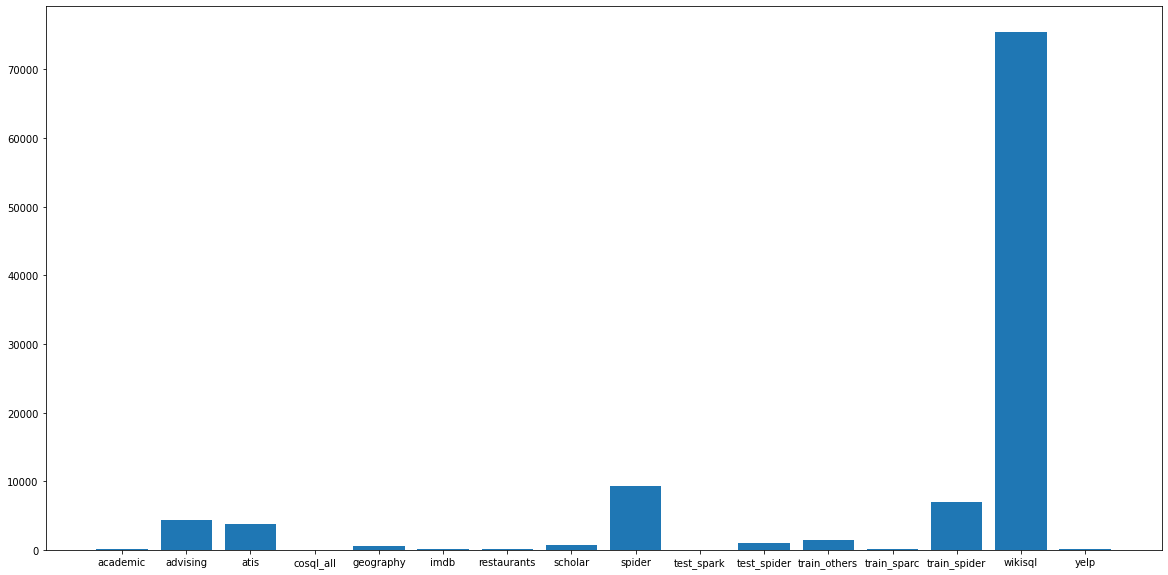

In [69]:
grouped = Final_df.groupby('source').count()
plt.figure(figsize=(20,10))
plt.bar(x = grouped.index, height = grouped.question)
plt.show()

In [70]:
grouped

,question,sql
source,,
academic,185,185
advising,4366,4366
atis,3827,3827
cosql_all,8,8
geography,607,607
imdb,125,125
restaurants,125,125
scholar,649,649
spider,9337,9337


In [71]:
Final_df

,question,source,sql
0,return me the homepage of journal_name0 .,academic,SELECT JOURNALalias0.HOMEPAGE FROM JOURNAL AS ...
1,"return me the homepage of "" author_name0 "" .",academic,SELECT AUTHORalias0.HOMEPAGE FROM AUTHOR AS AU...
2,"return me the abstract of "" publication_title0...",academic,SELECT PUBLICATIONalias0.ABSTRACT FROM PUBLICA...
3,"return me the year of "" publication_title0 """,academic,SELECT PUBLICATIONalias0.YEAR FROM PUBLICATION...
4,return me the papers after publication_year0 .,academic,SELECT PUBLICATIONalias0.TITLE FROM PUBLICATIO...
...,...,...,...
14152,What are the countries where either English or...,cosql_all,select * from country join countrylanguage on ...
14213,Find the average age of students who do not ha...,cosql_all,select avg(age) from student where stuid not i...
14257,Find the name of students who have both cat an...,cosql_all,select student.fname from student join has_pet...
14501,What is the total population and average area ...,cosql_all,"select sum(population) , avg(surfacearea) from..."


In [72]:
Final_df.to_csv('final_data.csv', index=False)

### CREATE CSV 

In [10]:
final_academic.loc[:,'sql'] = final_academic.sql.str.upper().copy()

In [11]:
# Split list into new series
sql = final_academic['sql'].str.upper().str.split()

# Get amount of unique words
final_academic['sqlUniqueCounter'] = sql.apply(set).apply(len)

# Get amount of words
final_academic['sqlWordCounter'] = sql.apply(len)

In [21]:

final_academic['splitSQL'] = final_academic['sql'].str.upper().str.split()

In [39]:
final_academic['SELECT'] = final_academic.sql.str.count('SELECT')
final_academic['WHERE'] = final_academic.sql.str.count('WHERE')
final_academic['FROM'] = final_academic.sql.str.count('FROM')
final_academic['JOIN'] = final_academic.sql.str.count('JOIN')
final_academic['LIKE'] = final_academic.sql.str.count('LIKE')
final_academic['GROUP BY'] = final_academic.sql.str.count('GROUP BY')
final_academic['COUNT'] = final_academic.sql.str.count('COUNT')
final_academic['DISTINCT'] = final_academic.sql.str.count('DISTINCT')
final_academic['MIN'] = final_academic.sql.str.count('MIN')
final_academic['MAX'] = final_academic.sql.str.count('MAX')
final_academic['AVG'] = final_academic.sql.str.count('AVG')
final_academic

,question,source,sql,sqlUniqueCounter,sqlWordCounter,SELECT,WHERE,JOIN,FROM,LIKE,AND,OR,splitSQL,GROUP BY,COUNT,DISTINCT,MIN,MAX,AVG
0,return me the homepage of journal_name0 .,academic,SELECT JOURNALALIAS0.HOMEPAGE FROM JOURNAL AS ...,11,11,1,1,0,1,0,0,0,"[SELECT, JOURNALALIAS0.HOMEPAGE, FROM, JOURNAL...",0,0,0,0,0,0
1,"return me the homepage of "" author_name0 "" .",academic,SELECT AUTHORALIAS0.HOMEPAGE FROM AUTHOR AS AU...,11,11,1,1,0,1,0,0,5,"[SELECT, AUTHORALIAS0.HOMEPAGE, FROM, AUTHOR, ...",0,0,0,0,0,0
2,"return me the abstract of "" publication_title0...",academic,SELECT PUBLICATIONALIAS0.ABSTRACT FROM PUBLICA...,11,11,1,1,0,1,0,0,0,"[SELECT, PUBLICATIONALIAS0.ABSTRACT, FROM, PUB...",0,0,0,0,0,0
3,"return me the year of "" publication_title0 """,academic,SELECT PUBLICATIONALIAS0.YEAR FROM PUBLICATION...,11,11,1,1,0,1,0,0,0,"[SELECT, PUBLICATIONALIAS0.YEAR, FROM, PUBLICA...",0,0,0,0,0,0
4,return me the papers after publication_year0 .,academic,SELECT PUBLICATIONALIAS0.TITLE FROM PUBLICATIO...,11,11,1,1,0,1,0,0,0,"[SELECT, PUBLICATIONALIAS0.TITLE, FROM, PUBLIC...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,return me the authors who have more than publi...,academic,SELECT AUTHORALIAS0.NAME FROM AUTHOR AS AUTHOR...,35,47,1,1,0,1,0,3,5,"[SELECT, AUTHORALIAS0.NAME, FROM, AUTHOR, AS, ...",1,1,1,0,0,0
181,return me the author who has the most number o...,academic,SELECT AUTHORALIAS0.NAME FROM AUTHOR AS AUTHOR...,36,49,1,1,0,1,0,3,6,"[SELECT, AUTHORALIAS0.NAME, FROM, AUTHOR, AS, ...",1,1,1,0,0,0
182,return me the authors who have more papers on ...,academic,SELECT DERIVED_FIELDALIAS0 FROM ( SELECT AUTHO...,56,117,3,3,0,3,0,7,10,"[SELECT, DERIVED_FIELDALIAS0, FROM, (, SELECT,...",2,2,2,0,0,0
183,"return me the author in the "" organization_nam...",academic,SELECT AUTHORALIAS0.NAME FROM AUTHOR AS AUTHOR...,33,44,1,1,0,1,0,3,11,"[SELECT, AUTHORALIAS0.NAME, FROM, AUTHOR, AS, ...",1,0,0,0,0,0


In [40]:

final_spider['splitSQL'] = final_spider['sql'].str.upper().str.split()

In [41]:
# Split list into new series
sql = final_spider['sql'].str.upper().str.split()

# Get amount of unique words
final_spider['sqlUniqueCounter'] = sql.apply(set).apply(len)

# Get amount of words
final_spider['sqlWordCounter'] = sql.apply(len)

In [44]:
final_spider['SELECT'] = final_spider.sql.str.count('SELECT')
final_spider['WHERE'] = final_spider.sql.str.count('WHERE')
final_spider['FROM'] = final_spider.sql.str.count('FROM')
final_spider['JOIN'] = final_spider.sql.str.count('JOIN')
final_spider['LIKE'] = final_spider.sql.str.count('LIKE')
final_spider['GROUP BY'] = final_spider.sql.str.count('GROUP BY')
final_spider['COUNT'] = final_spider.sql.str.count('COUNT')
final_spider['DISTINCT'] = final_spider.sql.str.count('DISTINCT')
final_spider['MIN'] = final_spider.sql.str.count('MIN')
final_spider['MAX'] = final_spider.sql.str.count('MAX')
final_spider['AVG'] = final_spider.sql.str.count('AVG')
final_spider

,question,source,sql,splitSQL,sqlUniqueCounter,sqlWordCounter,SELECT,WHERE,FROM,JOIN,LIKE,GROUP BY,COUNT,DISTINCT,MIN,MAX,AVG
0,How many heads of the departments are older th...,spider,SELECT COUNT( * ) FROM HEAD AS HEADALIAS0 WHER...,"[SELECT, COUNT(, *, ), FROM, HEAD, AS, HEADALI...",13,13,1,1,1,0,0,0,1,0,0,0,0
0,"List the name , born state and age of the head...",spider,"SELECT HEADALIAS0.AGE , HEADALIAS0.BORN_STATE ...","[SELECT, HEADALIAS0.AGE, ,, HEADALIAS0.BORN_ST...",12,14,1,0,1,0,0,0,0,0,0,0,0
0,"List the creation year , name and budget of ea...",spider,"SELECT DEPARTMENTALIAS0.BUDGET_IN_BILLIONS , D...","[SELECT, DEPARTMENTALIAS0.BUDGET_IN_BILLIONS, ...",10,11,1,0,1,0,0,0,0,0,0,0,0
0,What are the maximum and minimum budget of the...,spider,SELECT MAX( DEPARTMENTALIAS0.BUDGET_IN_BILLION...,"[SELECT, MAX(, DEPARTMENTALIAS0.BUDGET_IN_BILL...",11,13,1,0,1,0,0,0,0,0,1,1,0
0,What is the average number of employees of the...,spider,SELECT AVG( DEPARTMENTALIAS0.NUM_EMPLOYEES ) F...,"[SELECT, AVG(, DEPARTMENTALIAS0.NUM_EMPLOYEES,...",15,15,1,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,What are the citizenships that are shared by s...,spider,SELECT SINGERALIAS0.CITIZENSHIP FROM SINGER AS...,"[SELECT, SINGERALIAS0.CITIZENSHIP, FROM, SINGE...",17,22,2,2,2,0,0,0,0,0,0,0,0
0,How many available features are there in total ?,spider,SELECT COUNT( * ) FROM OTHER_AVAILABLE_FEATURE...,"[SELECT, COUNT(, *, ), FROM, OTHER_AVAILABLE_F...",9,9,1,0,1,0,0,0,1,0,0,0,0
0,What is the feature type name of feature var0 ?,spider,SELECT DERIVED_TABLEALIAS0.FEATURE_TYPE_NAME F...,"[SELECT, DERIVED_TABLEALIAS0.FEATURE_TYPE_NAME...",17,19,1,1,1,1,0,0,0,0,0,0,0
0,Show the property type descriptions of propert...,spider,SELECT DERIVED_TABLEALIAS0.PROPERTY_TYPE_DESCR...,"[SELECT, DERIVED_TABLEALIAS0.PROPERTY_TYPE_DES...",16,18,1,0,1,1,0,1,0,0,0,0,0


In [13]:

def read_convert_df(path):
    data_medical = pd.DataFrame()
    lines = []
    sql = []
    question = []
    with open(path) as f:
        lines = f.readlines()
        
    print(path)
    count = 0
    for line in lines:
#         print(count)
        convertedDict = json.loads(line)
        question.append(convertedDict['question_refine'])
        sql.append(convertedDict['sql'])
    result = pd.DataFrame(columns=['question','sql','source'])
    result['question'] = question
    result['sql'] = sql
    result['source'] = 'medical'
    data_medical = pd.concat([result,data_medical], axis=0, join='outer', ignore_index=False)
    return data_medical

In [25]:
pathList = [
          'mimicsql_data/mimicsql_natural/dev.json',
           'mimicsql_data/mimicsql_natural/test.json',
           'mimicsql_data/mimicsql_natural/train.json',
           'mimicsql_data/mimicsql_natural_v2/dev.json',
            'mimicsql_data/mimicsql_natural_v2/test.json',
           'mimicsql_data/mimicsql_natural_v2/train.json',
            'mimicsql_data/mimicsql_template/dev.json',
            'mimicsql_data/mimicsql_template/test.json',
           'mimicsql_data/mimicsql_template/train.json'
           ]


In [28]:
data_medical = pd.DataFrame()
for path in pathList:

    result = read_convert_df(path)
    data_medical = pd.concat([result,data_medical], axis=0, join='outer', ignore_index=False)
data_medical.to_csv('CSV/data_medical.csv')

mimicsql_data/mimicsql_natural/dev.json
mimicsql_data/mimicsql_natural/test.json
mimicsql_data/mimicsql_natural/train.json
mimicsql_data/mimicsql_natural_v2/dev.json
mimicsql_data/mimicsql_natural_v2/test.json
mimicsql_data/mimicsql_natural_v2/train.json
mimicsql_data/mimicsql_template/dev.json
mimicsql_data/mimicsql_template/test.json
mimicsql_data/mimicsql_template/train.json


In [27]:
data_medical

,question,sql,source
0,how many patients whose language is hait?,"SELECT COUNT ( DISTINCT DEMOGRAPHIC.""SUBJECT_I...",medical
1,give me the number of patients whose religion ...,"SELECT COUNT ( DISTINCT DEMOGRAPHIC.""SUBJECT_I...",medical
2,how many patients whose ethnicity is white - r...,"SELECT COUNT ( DISTINCT DEMOGRAPHIC.""SUBJECT_I...",medical
3,provide the number of patients whose primary d...,"SELECT COUNT ( DISTINCT DEMOGRAPHIC.""SUBJECT_I...",medical
4,count the number of patients whose primary dis...,"SELECT COUNT ( DISTINCT DEMOGRAPHIC.""SUBJECT_I...",medical
...,...,...,...
995,find the average age of patients under the age...,"SELECT AVG ( DEMOGRAPHIC.""AGE"" ) FROM DEMOGRAP...",medical
996,what is the average age of patients in or abov...,"SELECT AVG ( DEMOGRAPHIC.""AGE"" ) FROM DEMOGRAP...",medical
997,calculate the average age of patients admitted...,"SELECT AVG ( DEMOGRAPHIC.""AGE"" ) FROM DEMOGRAP...",medical
998,what is maximum age of patients who have staye...,"SELECT MAX ( DEMOGRAPHIC.""AGE"" ) FROM DEMOGRAP...",medical


In [49]:
cosqlF = open('cosql_train.json')
cosql_json = json.load(cosqlF)
questions = []
sql = []
cosql = pd.DataFrame()
for data in cosql_json:
    questions.append(data['final']['utterance'])
    sql.append(data['final']['query'])
cosql['question'] = questions
cosql['sql'] = sql
cosql['source'] = 'cosql'

In [51]:
cosql.to_csv('CSV/cosql.csv')

In [45]:
cosql_json[0]['final']['utterance']

'Find the name of the department which has the highest average salary of professors.'

In [47]:
cosql_json[0]['final']['query']

'SELECT dept_name FROM instructor GROUP BY dept_name ORDER BY avg(salary) DESC LIMIT 1'